In [37]:
import pandas as pd
import numpy as np
import time
import cantera as ct
import matplotlib.pyplot as plt

## Cantera IDT calculations


In [38]:
def ignition_delay(states, species):
    """
    This function computes the ignition delay from the occurence of the
    peak in species' concentration.
    """
    i_ign = states(species).Y.argmax()
    return states.t[i_ign]

print(f"Runnning Cantera version: {ct.__version__}")

Runnning Cantera version: 3.2.0


In [39]:
def calculate_ignition_delay_const_pressure_batch_reactor(T5_list, P5_list, reactants, plot=False):
    # batch reactor adiabatic constant pressure
    ignition_delay_times = []
    for T5, P5 in zip(T5_list, P5_list):
        gas = ct.Solution("CH4_1.0.yaml")
        
        # Define the reactor temperature and pressure
        reactor_temperature = T5  # Kelvin
        reactor_pressure_atm = P5  # atm
        reactor_pressure = reactor_pressure_atm * 101325  # Pascals

        gas.TPX = reactor_temperature, reactor_pressure, reactants
        #print("Mole fractions:", gas.X)

        reactor = ct.IdealGasConstPressureReactor(gas, energy='on')
        reactor_network = ct.ReactorNet([reactor])

        time_history = ct.SolutionArray(gas, extra="t")

        reference_species = "OH"

        t0 = time.time()

        estimated_ignition_delay_time = 0.01
        t = 0

        counter = 1
        while t < estimated_ignition_delay_time:
            t = reactor_network.step()
            if not counter % 10:
                time_history.append(reactor.thermo.state, t=t)
            counter += 1

        tau = ignition_delay(time_history, reference_species)
        
        ignition_delay_times.append(tau)

        t1 = time.time()

        print(f"T5 = {T5} K, P5 = {P5} atm, Computed Ignition Delay: {tau:.3e} seconds. Took {t1-t0:3.2f}s to compute")
        
    if plot:
        scaled_inverse_T5 = [1000.0 / T for T in T5_list]

        plt.figure(figsize=(8, 6))
        plt.scatter(scaled_inverse_T5, ignition_delay_times, label='Cantera', color='blue')
        plt.xlabel('1000/T5 (1/K)')
        plt.ylabel('Ignition Delay Time (s)')
        plt.yscale('log')
        plt.legend()
        plt.title('Ignition Delay Times Comparison')
        plt.grid(True)
        plt.show()
        
    return ignition_delay_times

C:\Users\barki\AppData\Local\Temp\ipykernel_40568\998202970.py:5: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution("CH4_1.0.yaml")
C:\Users\barki\AppData\Local\Temp\ipykernel_40568\998202970.py:5: UserWarning: NasaPoly2::validate: 
For species CH2OCH, discontinuity in cp/R detected at Tmid = 500
	Value computed using low-temperature polynomial:  8.393471510000001
	Value computed using high-temperature polynomial: 9.1801039121875

  gas = ct.Solution("CH4_1.0.yaml")
C:\Users\barki\AppData\Local\Temp\ipykernel_40568\998202970.py:5: UserWarning: NasaPoly2::validate: 
For species CH2OCH, discontinuity in h/RT detected at Tmid = 500
	Value computed using low-temperature polynomial:  42.199147089791666
	Value computed using high-temperature polynomial: 41.961461604875005

  gas = ct.Solution

T5 = 1537 K, P5 = 40 atm, Computed Ignition Delay: 1.201e-04 seconds. Took 0.26s to compute
T5 = 1445 K, P5 = 40 atm, Computed Ignition Delay: 2.727e-04 seconds. Took 0.26s to compute
T5 = 1400 K, P5 = 40 atm, Computed Ignition Delay: 4.118e-04 seconds. Took 0.26s to compute
T5 = 1363 K, P5 = 40 atm, Computed Ignition Delay: 5.786e-04 seconds. Took 0.27s to compute
T5 = 1342 K, P5 = 40 atm, Computed Ignition Delay: 7.015e-04 seconds. Took 0.27s to compute


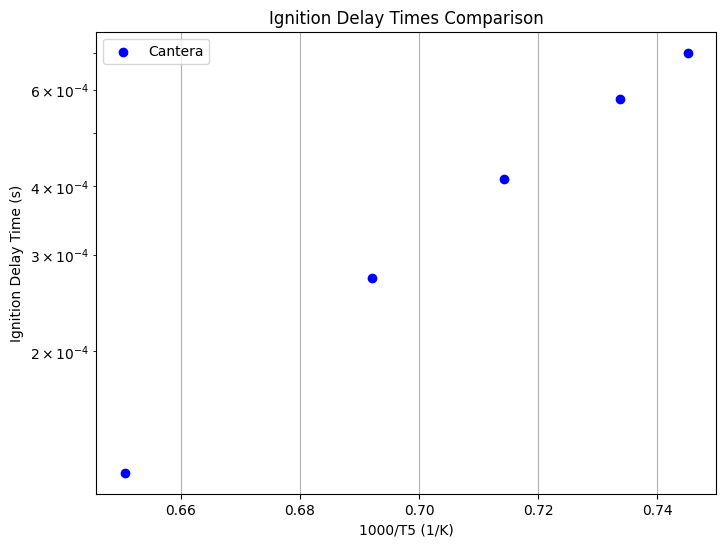

In [40]:
T5_list = [1537, 1445, 1400, 1363, 1342]
P5_list = [40, 40, 40, 40, 40]
reactants = 'CH4:0.2, O2:0.133, AR:0.667'

ignition_delay_times = calculate_ignition_delay_const_pressure_batch_reactor(T5_list, P5_list, reactants, plot=True)


TODO:
- model params have uncertainty intervals, selecting a param value from each interval is building a surrogate, so i should definetily implement modifying yaml params. how to select params can be decide later. 

In [ ]:
mechanism_path= "C:\\Users\\barki\\Desktop\\master thesis\\papers\\mechanism\\ScienceDirect_files_18Dec2025_16-58-12.343\\C2H4_2021.yaml"
gas = ct.Solution('C2H4_2021.yaml')

rxn_id = 0
base_rxn = gas.reaction(rxn_id)
print(f"Reaction {rxn_id}: {base_rxn.equation}")
base_A = base_rxn.rate.pre_exponential_factor
base_n = base_rxn.rate.temperature_exponent  
base_Ea = base_rxn.rate.activation_energy
base_Ea_kelvin = base_Ea / ct.gas_constant  # Convert from J/mol to K

print(f"Reaction {rxn_id} original parameters: A={base_A}, n={base_n}, Ea={base_Ea_kelvin}")


for i, rxn in enumerate(gas.reactions()):
    #print(f"Reaction {i}: {rxn.equation} | Type: {rxn.reaction_type}")
    
    if rxn.reaction_type == 'Arrhenius':
        A = rxn.rate.pre_exponential_factor
        b = rxn.rate.temperature_exponent
        Ea = rxn.rate.activation_energy # J/kmol
    elif rxn.reaction_type == 'three-body-Arrhenius':
        print(i)
    elif rxn.reaction_type == 'falloff-Troe':
        print(i)
    elif rxn.reaction_type == 'pressure-dependent-Arrhenius':
        print(i)
    elif rxn.reaction_type == 'falloff-Lindemann':
        print(i)
    else:
        print(f"Reaction {i} has unhandled reaction type: {rxn.reaction_type}")
    

Reaction 0: 2 O + M <=> O2 + M
Reaction 0 original parameters: A=54000000.00000001, n=0.0, Ea=-899.7
<bound method Kinetics.reactions of <cantera.composite.Solution object at 0x0000020EEE5D6F00>>
0
1
4
9
10
11
12
13
19
27
29
33
44
59
64
65
76
85
97
106
118
135
136
137
139
164
167
168
193
194
195
203
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
241
242
243
244
245
246
268
269
272
273
274
275
276
283
284
316
317
321
322
326
327
328
329
330
331
332
333
334
335
336
337
338
339
347
355
372
373
374
415
416
417
418
450
465
486
487
493
497
517
524
537
547
557
558
574
583
584
585
685
723
745
747
843


C:\Users\barki\AppData\Local\Temp\ipykernel_40568\1638384308.py:2: UserWarning: NasaPoly2::validate: 
For species CH2OCH, discontinuity in cp/R detected at Tmid = 500
	Value computed using low-temperature polynomial:  8.393471510000001
	Value computed using high-temperature polynomial: 9.1801039121875

  gas = ct.Solution('C2H4_2021.yaml')
C:\Users\barki\AppData\Local\Temp\ipykernel_40568\1638384308.py:2: UserWarning: NasaPoly2::validate: 
For species CH2OCH, discontinuity in h/RT detected at Tmid = 500
	Value computed using low-temperature polynomial:  42.199147089791666
	Value computed using high-temperature polynomial: 41.961461604875005

  gas = ct.Solution('C2H4_2021.yaml')
C:\Users\barki\AppData\Local\Temp\ipykernel_40568\1638384308.py:2: UserWarning: NasaPoly2::validate: 
For species CH2OCH, discontinuity in s/R detected at Tmid = 500
	Value computed using low-temperature polynomial:  33.70692865946735
	Value computed using high-temperature polynomial: 33.51209988778391

  gas =

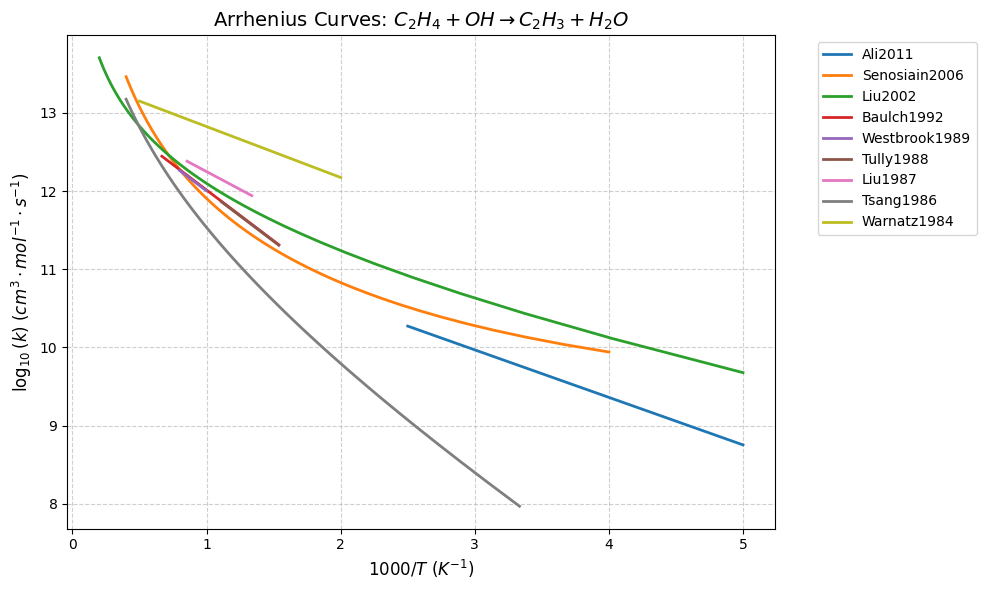

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Data set based on provided parameters
# Format: (Label, A, n, E, T_min, T_max)
kinetics_data = [
    ("Ali2011", 6.20E+11, 0.00, 1400.0, 200, 400),
    ("Senosiain2006", 1.31E-01, 4.20, -433.0, 250, 2500),
    ("Liu2002", 2.10E+06, 2.01, 585.0, 200, 5000),
    ("Baulch1992", 2.05E+13, 0.00, 2990.0, 650, 1500),
    ("Westbrook1989", 2.00E+13, 0.00, 2990.0, 1003, 1253),
    ("Tully1988", 2.02E+13, 0.00, 2990.0, 650, 901),
    ("Liu1987", 1.45E+13, 0.00, 2100.0, 748, 1170),
    ("Tsang1986", 1.57E+04, 2.75, 2100.0, 300, 2500),
    ("Warnatz1984", 3.00E+13, 0.00, 1500.0, 500, 2000),
]

def calculate_rate(T, A, n, E):
    """Modified Arrhenius Equation: k = A * T^n * exp(-E/T)"""
    return A * (T**n) * np.exp(-E / T)

# Plotting configuration
plt.figure(figsize=(10, 6))

for label, A, n, E, t_min, t_max in kinetics_data:
    # Generate temperature range for each specific study
    T = np.linspace(t_min, t_max, 100)
    k = calculate_rate(T, A, n, E)
    
    # Standard Arrhenius plot: log10(k) vs 1000/T
    plt.plot(1000 / T, np.log10(k), label=label, linewidth=2)

# Graph formatting
plt.xlabel(r'$1000 / T$ ($K^{-1}$)', fontsize=12)
plt.ylabel(r'$\log_{10}(k)$ ($cm^3 \cdot mol^{-1} \cdot s^{-1}$)', fontsize=12)
plt.title(r'Arrhenius Curves: $C_2H_4 + OH \rightarrow C_2H_3 + H_2O$', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()

# Save and show
plt.savefig('arrhenius_plot.png', dpi=300)
plt.show()